# Pandas Project Final 

### Loading the Dataset

In [89]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import sys  #enables us to use sys.stdout b

In [90]:
gps=pd.read_csv('googleplaystore.csv')
gps #The google playstore data is now a dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### First view at the Dataset

In [91]:
#Uncomment below as required
#gps.head
#print(gps['App'][0:5]) #A view of the first 5 apps
#print(gps.describe)
#print(gps.columns)

### Data Cleaning 
##### refer to the README or the pandas_project_RB file for the list of Methods

### Buisness Requirements:
We have 13 columns (inc category, rating, reviews, size, installs, type, price, genre
so category and genre are presenting the same data, we can remove one of these columns, additionally the size column as a variable doesn't seem like necessary or useful data regarding the buisness objectives and concurrent questions, so this can also be dropped as well as android ver.
Duplicated values to be removed. 

In [92]:
#First identifying any null values
gps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [93]:
#identifying duplicate values 
gps_duplicates = gps[gps.duplicated(keep=False)]
gps.drop_duplicates(keep='first', inplace=True)

In [94]:
gps.shape

(10358, 13)

In [95]:
#Checking if any duplicate values contain any of the missing data for the null values
#Updating null elements with value in the same location using the combine_first method
gps.combine_first(gps_duplicates)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [96]:
gps.isna().sum()
#No duplicated values included information that wasn't in an original

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Dropping duplicated data

In [97]:
gps.drop_duplicates(keep='first', inplace=True)

### Dropping unnecessary columns 

In [98]:
unique_category_count = len(gps['Category'].unique())
print("Number of unique categories:", unique_category_count)
unique_genres_count = len(gps['Genres'].unique())
print("Number of unique genres:", unique_genres_count)
#There are more unique Genres so we can drop this colunn

Number of unique categories: 34
Number of unique genres: 120


In [99]:
#Method 1:dropping android version, Genres and Size column
to_drop = ['Android Ver', 'Genres', 'Size']
gps.drop(to_drop, inplace=True, axis=1 )
gps.shape

(10358, 10)

In [100]:
gps = gps.dropna(thresh=2)
gps.shape
#All fields have under 2 NaNs as the shape has not changed

(10358, 10)

In [101]:
gps

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,"June 20, 2018",1.1
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,"5,000+",Free,0,Everyone,"July 25, 2017",1.48
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100+,Free,0,Everyone,"July 6, 2018",1.0
10838,Parkinson Exercices FR,MEDICAL,NaN,3,"1,000+",Free,0,Everyone,"January 20, 2017",1.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,"1,000+",Free,0,Mature 17+,"January 19, 2015",Varies with device


### Dropping null values 

In [102]:
gps = gps.dropna() #NUll values dropped
gps

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,"June 20, 2018",1.1
...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,500+,Free,0,Everyone,"June 18, 2017",1.0.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,"5,000+",Free,0,Everyone,"July 25, 2017",1.48
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100+,Free,0,Everyone,"July 6, 2018",1.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,"1,000+",Free,0,Mature 17+,"January 19, 2015",Varies with device


In [103]:
gps.isna().sum()


App               0
Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
Current Ver       0
dtype: int64

In [105]:
#making the install values numeric
gps['Installs'] = gps['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
gps['Installs'] = gps['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
gps['Installs'] = gps['Installs'].apply(lambda x: int(x))
gps.head()

C:\Users\razgr\AppData\Local\Temp\ipykernel_11980\3780992944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps['Installs'] = gps['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
C:\Users\razgr\AppData\Local\Temp\ipykernel_11980\3780992944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps['Installs'] = gps['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
C:\Users\razgr\AppData\Local\Temp\ipykernel_11980\3780992944.py:3: SettingWithCopyWarning: 
A valu

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,"January 7, 2018",1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,"August 1, 2018",1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen,"June 8, 2018",Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone,"June 20, 2018",1.1


In [106]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8888 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8888 non-null   object 
 1   Category        8888 non-null   object 
 2   Rating          8888 non-null   float64
 3   Reviews         8888 non-null   object 
 4   Installs        8888 non-null   int64  
 5   Type            8888 non-null   object 
 6   Price           8888 non-null   object 
 7   Content Rating  8888 non-null   object 
 8   Last Updated    8888 non-null   object 
 9   Current Ver     8888 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 763.8+ KB


### Standardising the date columns to datetime

In [77]:
#Formatting the date of the Last Updated column
gps['Last Updated'] = pd.to_datetime(gps['Last Updated'])
gps

C:\Users\razgr\AppData\Local\Temp\ipykernel_11980\1772501849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps['Last Updated'] = pd.to_datetime(gps['Last Updated'])


,App,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0
1,Coloring book moana,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4
3,Sketch - Draw & Paint,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device
4,Pixel Draw - Number Art Coloring Book,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1
...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,4.0,7,500+,Free,0,Everyone,Education,2017-06-18,1.0.0
10836,Sya9a Maroc - FR,4.5,38,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,100+,Free,0,Everyone,Education,2018-07-06,1.0
10839,The SCP Foundation DB fr nn5n,4.5,114,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device


### Visualisations

C:\Users\razgr\AppData\Local\Temp\ipykernel_11980\3274799510.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=gps, palette=type_colors.values())


Text(0.5, 1.0, 'Count of Free and Paid Apps in Google PlayStore')

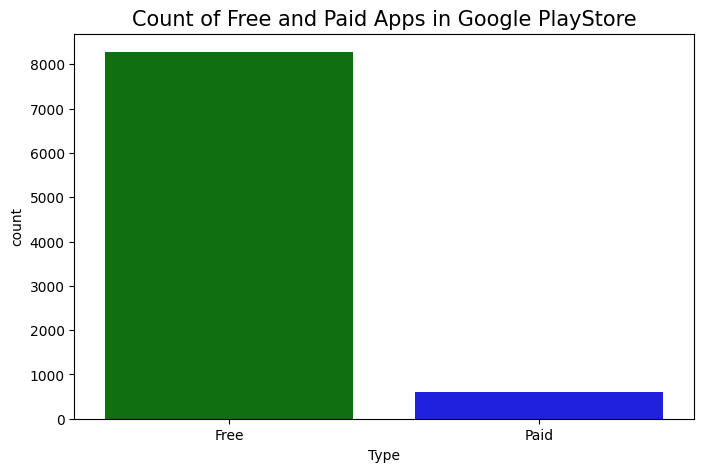

In [127]:
type_colors = {'Free': 'green', 'Paid': 'blue'}  

plt.figure(figsize=(8,5))  #a tuple (width, height) in inches

sns.countplot(x='Type', data=gps, palette=type_colors.values())
plt.title("Count of Free and Paid Apps in Google PlayStore", color='black', fontsize=15)

#We can see the majority of apps are free in this dataset

C:\Users\razgr\AppData\Local\Temp\ipykernel_11980\762138261.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Category", y="Installs", data=gps, ci=None, hue = 'Category')  # Set ci=None to remove error bars


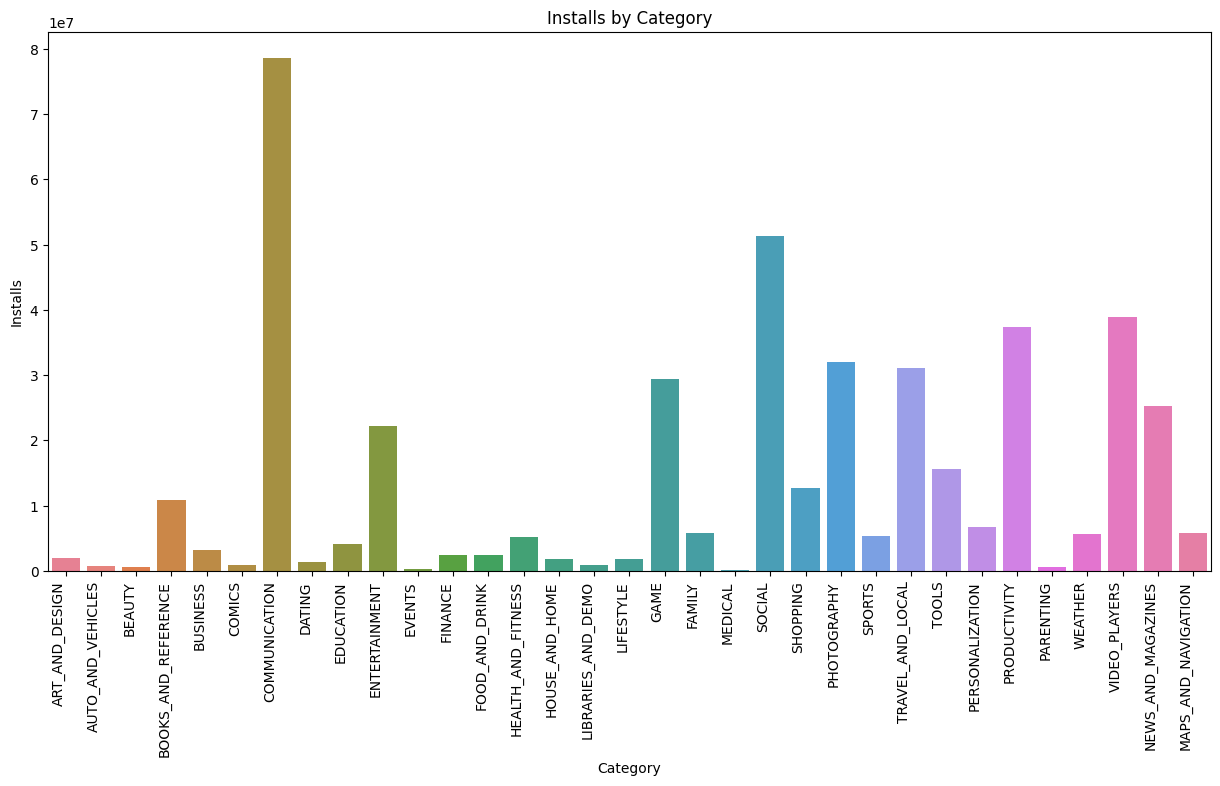

In [163]:
#barplot for Category against Installs (1*10^7)
plt.figure(figsize=(15, 7))
sns.barplot(x="Category", y="Installs", data=gps, ci=None, hue = 'Category')  # Set ci=None to remove error bars
plt.xticks(rotation=90, ha='right')  # Rotate the x-axis labels by 45 degrees and align them to the right
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('Installs by Category')
plt.show()

The dataset is quite large to represent for some graphs, the sbuset gps2 is being used below

In [151]:
gps2 = gps.head(500)

C:\Users\razgr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\razgr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


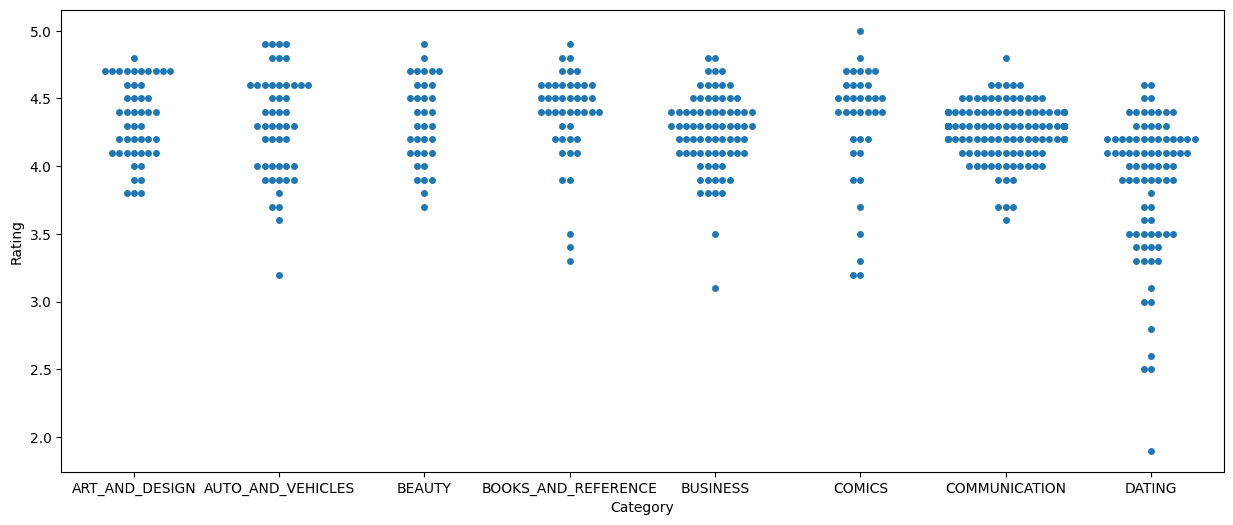

In [152]:
#Swarm plot to see the category and rating distribution 
fig, ax = plt.subplots(figsize=(15, 6))
sns.swarmplot(x='Category', y='Rating', data=gps2, ax=ax, size=5) #Adjusted the x,y lengths with ax and the ratio(size) as needed
plt.show()

In [164]:
gps2

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,"January 7, 2018",1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,"August 1, 2018",1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen,"June 8, 2018",Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone,"June 20, 2018",1.1
...,...,...,...,...,...,...,...,...,...,...
575,"FastMeet: Chat, Dating, Love",DATING,4.2,22545,1000000,Free,0,Mature 17+,"July 27, 2018",1.31.4
576,Christian Dating For Free App,DATING,3.9,8723,500000,Free,0,Mature 17+,"June 20, 2018",15.8
577,Glam - Premium Dating App,DATING,4.3,23170,500000,Free,0,Mature 17+,"July 25, 2018",1.5.4.0
578,"iDates - Chats, Flirts, Dating, Love & Relations",DATING,3.4,13890,500000,Free,0,Mature 17+,"June 19, 2018",4.9.2 (Oasis)


In [166]:
gps2['Reviews'] = pd.to_numeric(gps2['Reviews'], errors='coerce')

C:\Users\razgr\AppData\Local\Temp\ipykernel_11980\1317318698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps2['Reviews'] = pd.to_numeric(gps2['Reviews'], errors='coerce')


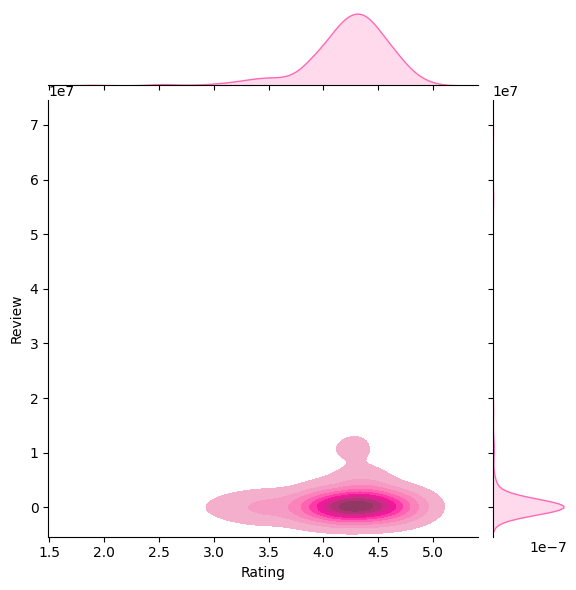

In [167]:
sns.jointplot(x=gps2['Rating'], y = gps2['Reviews'], kind = 'kde' ,color = 'hotpink', fill = 'True').set_axis_labels('Rating', 'Review')
#We can see the majority of reviews are collated from apps with between 4 and 4.5 stars


In [184]:
gps['Content Rating'].unique()
# 6 bins
content_ratings_count = gps['Content Rating'].value_counts()
print(content_ratings_count)

Everyone           7091
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64


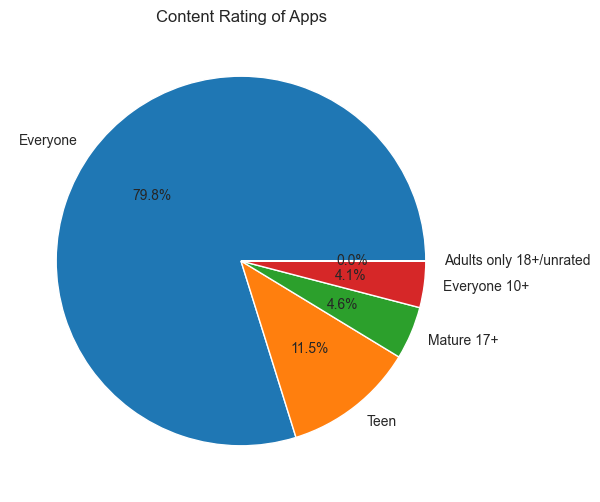

In [188]:
data = {'labels': ['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+/unrated'],
        'values': [7091,1022,411,360,1]}
df = pd.DataFrame(data)


sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df['values'], labels=df['labels'], autopct='%1.1f%%')
plt.title('Content Rating of Apps')
plt.show()